     Outlook Temperature Humidity    Wind PlayGolf
0      Sunny         Hot     High    Weak       No
1      Sunny         Hot     High  Strong       No
2   Overcast         Hot     High    Weak      Yes
3       Rain        Mild     High    Weak      Yes
4       Rain        Cool   Normal    Weak      Yes
5       Rain        Cool   Normal  Strong       No
6   Overcast        Cool   Normal  Strong      Yes
7      Sunny        Mild     High    Weak       No
8      Sunny        Cool   Normal    Weak      Yes
9       Rain        Mild   Normal    Weak      Yes
10     Sunny        Mild   Normal  Strong      Yes
11  Overcast        Mild     High  Strong      Yes
12  Overcast         Hot   Normal    Weak      Yes
13      Rain        Mild     High  Strong       No
Prediction: [0]
PlayGolf = NO


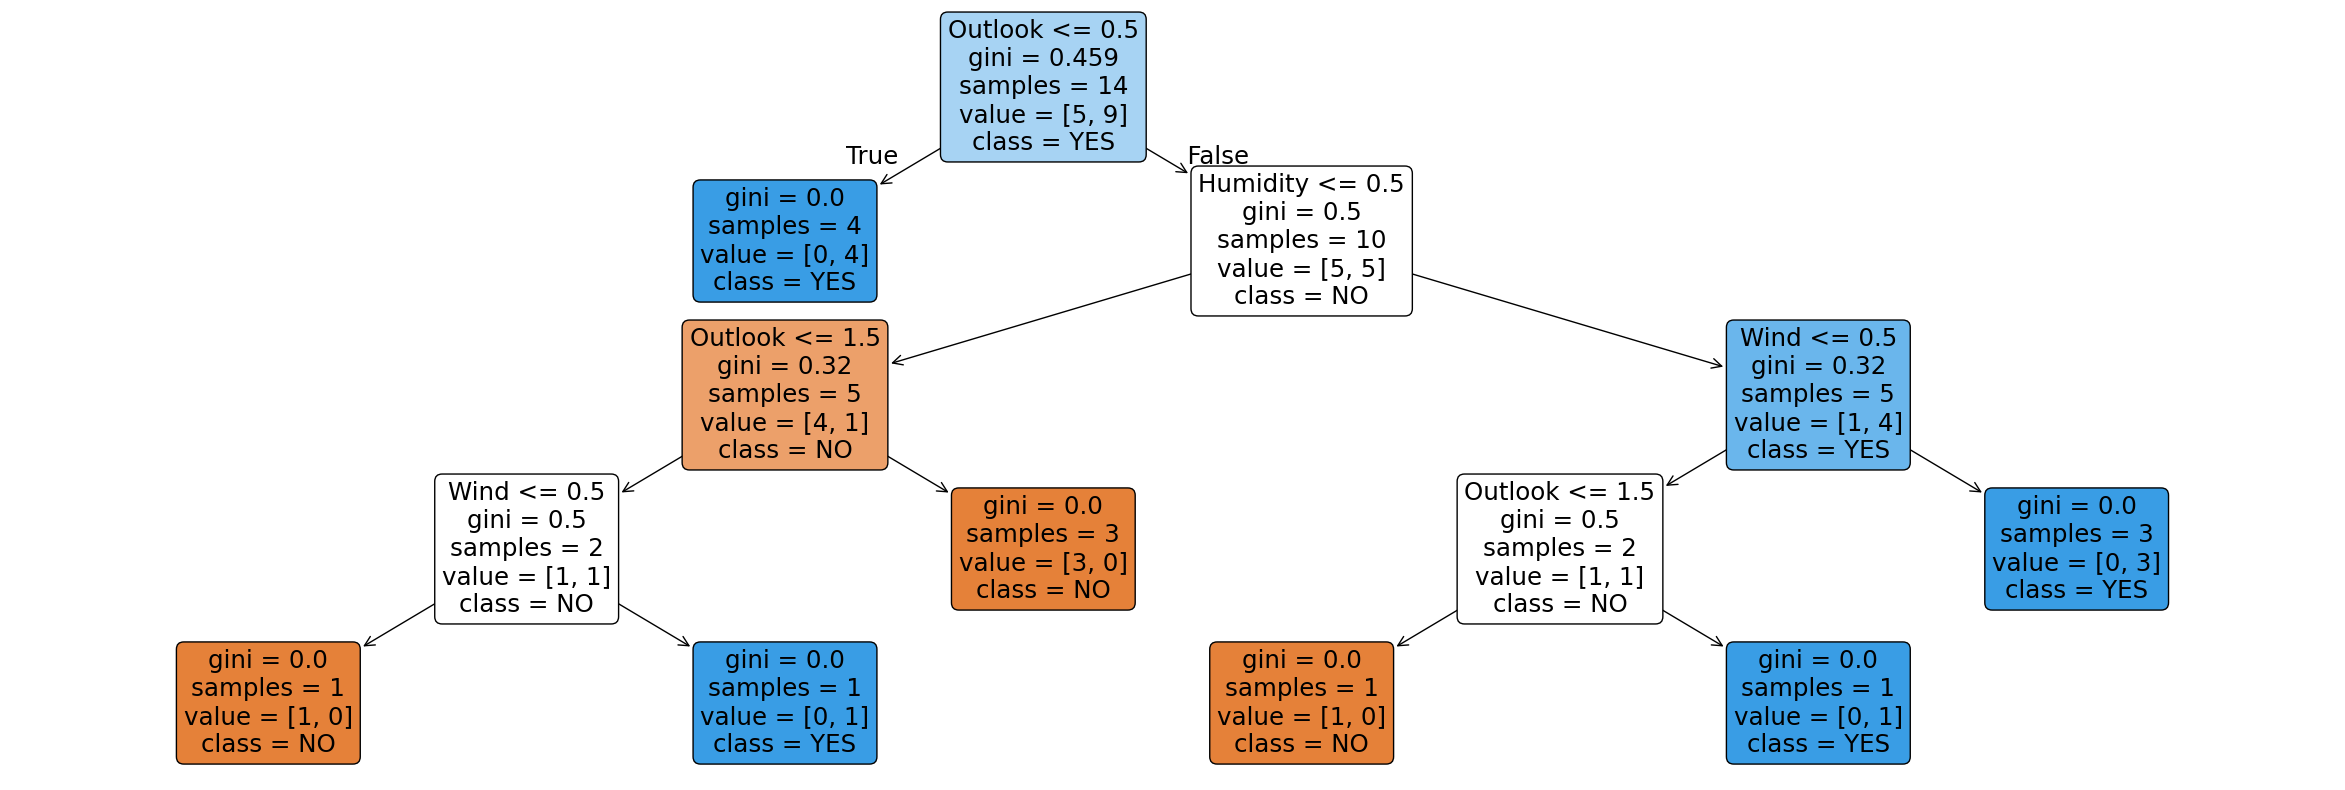

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from golf import golf_dataset
df = pd.DataFrame(golf_dataset)
print(df)

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop("PlayGolf", axis=1)
y = df["PlayGolf"]
cart_model = DecisionTreeClassifier(criterion= "gini")

cart_model.fit(X, y)
sample = pd.DataFrame(
    [[2, 0, 0, 1]],
    columns=["Outlook", "Temperature", "Humidity", "Wind"]
)

prediction = cart_model.predict(sample)

print("Prediction:", prediction)

if prediction[0] == 1:
    print("PlayGolf = YES")
else:
    print("PlayGolf = NO")
plt.figure(figsize=(30,10))

plot_tree(
    cart_model,
    feature_names=["Outlook", "Temperature", "Humidity", "Wind"],
    class_names=["NO", "YES"],
    filled=True,
    rounded=True
)

plt.show()
